# 🚨 ScamSniffer: AI-Powered Scam Detection System

Welcome to my capstone project — **ScamSniffer**, an intelligent and hybrid system built to detect scam messages using a combination of **Machine Learning** and **Large Language Models (LLMs)**.

## 📌 Objective:
With the growing volume of digital messages, distinguishing between legitimate and fraudulent content has become crucial. This project aims to:
- Automatically classify text messages as **scam** or **non-scam**
- Compare traditional **ML models** with advanced **Generative AI (LLM)** capabilities
- Build a robust, adaptable, and accurate message classification system

## 🧠 What’s Inside:
- Preprocessing of real-world SMS dataset
- Model training using **Logistic Regression**
- Evaluation using accuracy, precision, recall, and F1 score
- Integration with **Google Gemini API** to showcase LLM predictions
- A hybrid approach combining the speed of ML with the intelligence of LLMs

## ⚙️ Technologies Used:
- Python, scikit-learn, NLTK, TF-IDF
- Google Gemini API (Generative AI)
- Jupyter Notebook for interactive development

This notebook demonstrates both traditional and cutting-edge AI methods for detecting scam messages. Let’s dive in! 🔍💬

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import random,time

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# 📊 Dataset Overview

We are using a labeled dataset containing messages/emails along with binary labels:
- `1`: Scam
- `0`: Not Scam

The dataset contains samples of phishing, spam, scam, and legitimate technical or business communications.

Key columns:
- `text`: The email or message content.
- `label`: Binary target (1 = Scam, 0 = Not Scam)

**✅ Step 2: Loading and Exploring the Dataset**

In [4]:
# Replace 'your_file.csv' with your actual file name
df = pd.read_csv('your_file.csv')

df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [5]:
df.shape

(83448, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


# 🔧 Data Preprocessing

- Convert text to lowercase.
- Remove special characters / digits / URLs if needed.
- Use TF-IDF vectorizer to transform text data into numerical format.

In [8]:
# Uncomment and run if not installed
#!pip install nltk

⚙️ Preprocessing Code

In [10]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    tokens = nltk.word_tokenize(text)  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stopwords + Lemmatize
    return ' '.join(tokens)


df['clean_text'] = df['text'].apply(preprocess_text)

df[['text', 'clean_text']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,clean_text
0,ounce feather bowl hummingbird opec moment ala...,ounce feather bowl hummingbird opec moment ala...
1,wulvob get your medircations online qnb ikud v...,wulvob get medircations online qnb ikud viagra...
2,computer connection from cnn com wednesday es...,computer connection cnn com wednesday escapenu...
3,university degree obtain a prosperous future m...,university degree obtain prosperous future mon...
4,thanks for all your answers guys i know i shou...,thanks answer guy know checked rsync manual wo...


# 🤖 Traditional ML Model - Logistic Regression

To begin the classification process, a **Logistic Regression** model was trained using an 80-20 train-test split. Logistic Regression is known for its simplicity, interpretability, and surprisingly strong performance on binary classification tasks like spam detection.

We use `TfidfVectorizer` + `LogisticRegression` to classify the messages.

Steps:
1. Vectorize text data
2. Train logistic regression
3. Evaluate using accuracy, precision, recall, F1

**✅ Step 4: Text Vectorization (TF-IDF)**

✨ TF-IDF Vectorization Code:

In [38]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # can increase or decrease features if needed

X = tfidf.fit_transform(df['clean_text'])

y = df['label']

print("TF-IDF matrix shape:", X.shape)

TF-IDF matrix shape: (83448, 5000)


X: feature matrix (sparse matrix format)

y: labels (0 = not scam, 1 = scam)

**✅ Step 5: Train-Test Split & Model Training**

1. Split the dataset into training and testing
2. Train a basic Logistic Regression model 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9825044937088077

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      7938
           1       0.98      0.99      0.98      8752

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690



### ⚙️ Train-Test Split:
- **Training Set**: 80%
- **Test Set**: 20%

### 📊 Performance Metrics:
- **Accuracy**: **98.25%**
- **Precision (Non-Scam [0]): 99%**
- **Recall (Non-Scam [0]): 98%**
- **Precision (Scam [1]): 98%**
- **Recall (Scam [1]): 99%**
- **F1-Score (Both classes): 98%**

### ✅ Conclusion:
The Logistic Regression model performs **exceptionally well**, achieving over **98% across all key metrics**. This indicates:
- High reliability in distinguishing **scam from non-scam** messages.
- Excellent generalization capability.
- A **lightweight, interpretable model** that can serve as a **strong standalone solution** or a **baseline for more advanced techniques** like LLMs.

# 📊 Visualization

**✅ 1. Spam vs Ham Message Distribution**

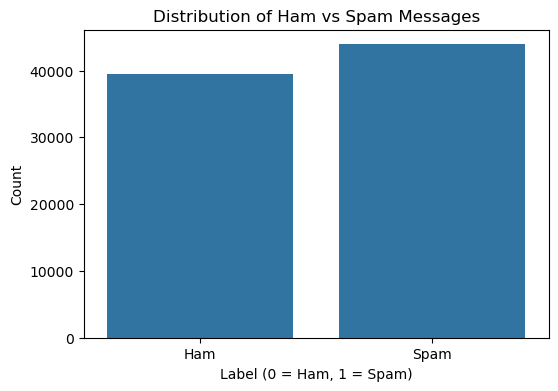

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Ham vs Spam Messages')
plt.xlabel('Label (0 = Ham, 1 = Spam)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

In [23]:
#!pip install wordcloud

**✅ 2. Most Common Words in Spam Messages (WordCloud)**

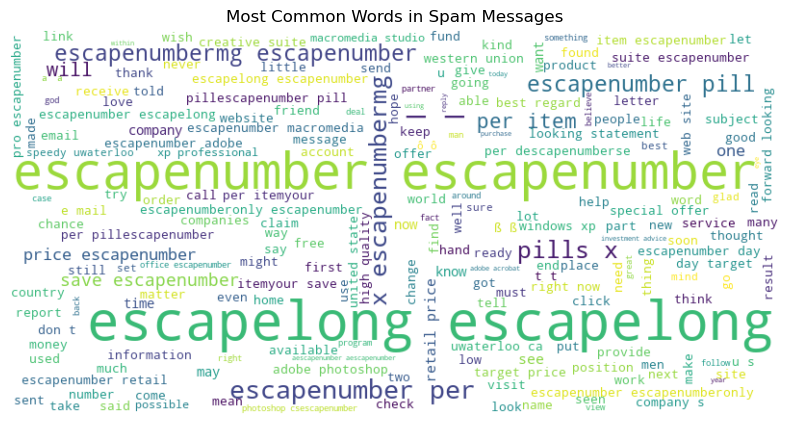

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all spam messages
spam_text = " ".join(df[df['label'] == 1]['text'])

spam_wc = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Spam Messages')
plt.show()

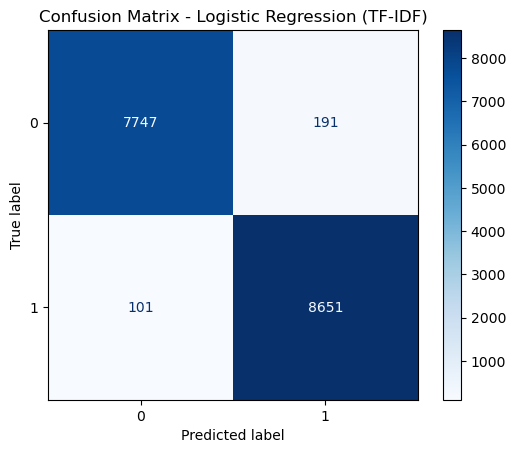

In [43]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (TF-IDF)')
plt.show()

# 🔮 Gemini API Integration

Used Google Gemini API to label test messages using prompt-based analysis.

Example Prompt:
> "Given this email message, classify it as a scam or not. Just say 'Scam' or 'Not Scam' and explain why..."

Analyze Gemini's reasoning to understand its decision-making.

In [56]:
# Uncomment and run if not installed
#!pip install -q -U google-generativeai

In [70]:
## 🚨 Before Running This Notebook
#- insert your own **Google Gemini API key** in the code cell where it says:
  #genai.configure(api_key="add_your_api_here")

#Import & Configure API
import google.generativeai as genai

genai.configure(api_key="add_your_api_here")

gemini_model = genai.GenerativeModel(model_name="models/gemini-1.5-flash")

In [72]:
# Prompt Gemini with Message
def ask_gemini_about_message(message):
    prompt = f"""
    You are an expert scam detector.

    Analyze the following message and tell me whether it is a scam or not. 
    Be concise, and return your answer in the format:
    
    Label: [Scam or Not Scam]
    Reason: [Your explanation]

    Message: {message}
    """

    response = gemini_model.generate_content(prompt)
    return response.text

In [74]:
print(ask_gemini_about_message("Congratulations! You've won a free iPhone. Click here to claim."))

Label: Scam
Reason: Unsolicited offers of valuable prizes are a hallmark of scams.  Legitimate companies don't contact people out of the blue to give away expensive electronics. Clicking the link could lead to malware, phishing, or other fraudulent activities.



**✨Step 6: Test Gemini on Real Dataset Samples**

Randomly pick a few messages from our cleaned dataset and get Gemini's reasoning for each.

In [76]:
# 5 random samples from dataset
samples = df.sample(2, random_state=40)

for i, row in samples.iterrows():
    print(f"\nOriginal Label: {'Scam' if row['label'] == 1 else 'Not Scam'}")
    print("Message:", row['text'][:200], "...\n")
    print("Gemini Output:")
    try:
        print(ask_gemini_about_message(row['text']))
    except Exception as e:
        print("Error:", e)
    print("-" * 80)
    time.sleep(1.5)  # Adding delay between requests


Original Label: Scam
Message:  stockupticks com image welcome to the stockupticks com newsletter issue escapenumber may escapenumber escapenumber image image image image image i level media group inc otcbb ilvl image dear reader a ...

Gemini Output:
Label: Scam

Reason: The message is a thinly veiled promotional piece disguised as a newsletter.  While it presents information about I Level Media Group, the heavy emphasis on positive attributes, lack of critical analysis, and the clear disclosure that it's a paid advertisement from Market Pathways Financial Relations Incorporated ("MP") for $24,000 strongly suggests a pump-and-dump scheme. The inclusion of a "safe harbor statement" and disclaimer attempting to deflect liability further reinforces suspicion.  The excessive use of images and the overall unprofessional formatting also raise red flags.  The email is clearly designed to generate excitement and encourage investment in ILVL, without providing any independent or balanced asses

# ⚔️ Comparative Analysis: ML vs Gemini

We run a small batch of test messages and compare:
- ML model prediction
- Gemini output
- True labels

This allows us to evaluate:
- Consistency
- Interpretability
- Reasoning quality

**Steps to be followed:** 
1. Predict using both ML and Gemini on the same test samples.

2. Comparing their outputs:
- Which one is correct?
- When do they disagree?
- What are the reasons Gemini gives vs ML confidence score?

3. Optionally make a table or chart to show this.

In [84]:
test_samples = df.sample(5, random_state=101)

X_test_vec = vectorizer.transform(test_samples['text'])

ml_preds = model.predict(X_test_vec)

results = []

#Compare ML vs Gemini
for idx, (i, row) in enumerate(test_samples.iterrows()):
    text = row['text']
    true_label = 'Scam' if row['label'] == 1 else 'Not Scam'
    ml_prediction = 'Scam' if ml_preds[idx] == 1 else 'Not Scam'

    print(f"\n🔍 Original Label: {true_label}")
    print(f"📨 Message: {text[:250]}...\n")
    print(f"🤖 ML Prediction: {ml_prediction}")

    summary = "N/A"
    try:
        gemini_response = ask_gemini_about_message(text)  # Make sure this is defined elsewhere
        print("🔮 Gemini Output:")
        print(gemini_response)

        summary = gemini_response.split('\n')[0] if isinstance(gemini_response, str) else str(gemini_response)
    except Exception as e:
        print("❌ Error with Gemini:", e)
        summary = f"Gemini Error: {str(e)}"

    # Append to results list
    results.append({
        "Original Label": true_label,
        "ML Prediction": ml_prediction,
        "Gemini Output": summary,
        "Message Snippet": text[:100] + "..."
    })

    print("-" * 100)
    time.sleep(1.5)

results_df = pd.DataFrame(results)
results_df[['Original Label', 'ML Prediction', 'Gemini Output', 'Message Snippet']]


🔍 Original Label: Not Scam
📨 Message:  francesco poli wrote in message news escapenumber escapelong frx firenze linux it sam hocevar wrote escapenumber the gplvescapenumber the latest draft did not raise major objections from legal i don't think that this is an accurate description of th...

🤖 ML Prediction: Not Scam
🔮 Gemini Output:
Label: Not Scam

Reason: This message appears to be a technical discussion about licensing compliance (likely relating to the Debian GNU/Linux project)  and contains no elements of a scam such as requests for money, personal information, or suspicious links.  The content is highly technical and unrelated to common scam tactics.

----------------------------------------------------------------------------------------------------

🔍 Original Label: Not Scam
📨 Message: hi mr . kaminski ,
please send me your assistants name and number so i can schedule a time for
you and kevin to go to lunch next week .
thanks !
rebekah rushing ( rebekah _ rushing @ enron . n

,Original Label,ML Prediction,Gemini Output,Message Snippet
0,Not Scam,Not Scam,Label: Not Scam,francesco poli wrote in message news escapenu...
1,Not Scam,Not Scam,Label: Scam (Likely),"hi mr . kaminski ,\nplease send me your assist..."
2,Not Scam,Not Scam,Label: Scam,url http build samba org home build master cac...
3,Not Scam,Not Scam,Label: Not Scam,on tue escapenumber escapenumber escapenumber ...
4,Not Scam,Not Scam,Label: Not Scam,although this query was inspired by distribute...


In [88]:
print("Actual columns in results_df:", results_df.columns.tolist())

Actual columns in results_df: ['Original Label', 'ML Prediction', 'Gemini Output', 'Message Snippet']


# 🧪 Try It Yourself: Interactive Scam Detector

Enter a custom message and get predictions from both:
- Logistic Regression
- Gemini LLM

Use widgets for input and display.

# ✅ Conclusion & Future Scope

- Gemini shows better interpretability and generalization
- ML is faster and usable offline
- A hybrid system (ML+LLM) gives the best of both

🔭 Future Improvements:
- Fine-tuning Gemini with domain-specific data
- Better feature engineering for ML
- Adding model confidence scores and visualization
- Integration with spam filters or email clients